#### Introduction

In [1]:
import pandas as pd
import numpy as np

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import random

### Generate A Sample Dataset

Assume:
- that we created a classifier that determines whether an email is a spam or not
- that classifier gives a score that ranges from zero to one depending on its confidence that an email is a spam. 
- it will give a score closer to one if it "thinks" that an email is a spam, and a score closer to zero if it considers that an email is not a spam.

In [46]:
actual_values = ['not_spam', 'not_spam', 'spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 'not_spam', 'spam', 
                     'not_spam', 'spam', 'spam', 'spam', 'not_spam', 'not_spam', 'spam', 'spam', 'not_spam', 
                     'not_spam', 'spam', 'not_spam', 'spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 'not_spam', 
                     'spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 'not_spam', 
                     'spam', 'not_spam', 'spam', 'not_spam', 'spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 
                     'spam', 'not_spam', 'not_spam', 'not_spam', 'spam', 'spam', 'spam', 'spam', 'not_spam', 'not_spam', 
                     'not_spam', 'not_spam', 'spam', 'spam', 'spam', 'not_spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 
                     'spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'spam', 'spam', 'not_spam', 'not_spam', 'not_spam',
                     'spam', 'spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 
                     'not_spam', 'spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'spam', 
                     'not_spam', 'spam', 'spam', 'spam', 'not_spam', 'not_spam']

In [47]:
set(actual_values)

{'not_spam', 'spam'}

In [54]:
calculated_values = [random.randrange(40,100,1) if x=='spam' else random.randrange(0,55,1) for x in actual_values]
calculated_values = [x/100 for x in calculated_values]

In [55]:
threshold = 0.5
predicted = ['spam' if x>threshold else 'not_spam' for x in calculated_values]

In [56]:
test_df = pd.DataFrame({'email_number': list(range(100)),
                        'actual': actual_values,
                        'classifier_score': calculated_values,
                        'predicted': predicted})

In [57]:
test_df.head()

,email_number,actual,classifier_score,predicted
0,0,not_spam,0.03,not_spam
1,1,not_spam,0.37,not_spam
2,2,spam,0.40,not_spam
3,3,not_spam,0.25,not_spam
4,4,spam,0.83,spam


In [58]:
test_df['actual'].value_counts()

not_spam    63
spam        37
Name: actual, dtype: int64

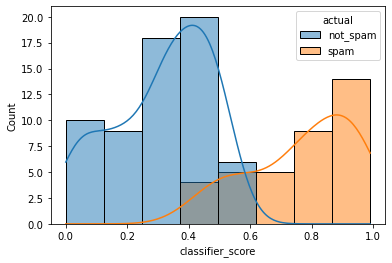

In [61]:
ax = sns.histplot(data=test_df, x="classifier_score", hue='actual', kde=True)

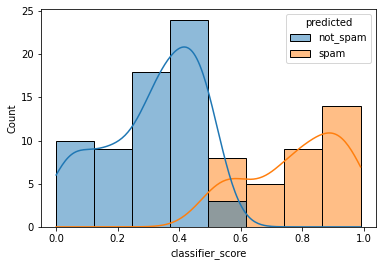

In [60]:
ax = sns.histplot(data=test_df, x="classifier_score", hue='predicted', kde=True)

### Testing the Accuracy

- To test the accuracy, we can compare the `actual` with the `predicted` column.
- Remember that `True` has a value of `1` in Python. Thus using `mean` to get the accuracy is valid. 

In [62]:
accuracy = (test_df['actual'] == test_df['predicted']).mean() * 100
accuracy

91.0

- Our model is 90% accurate
- But that is an incomplete picture of the performance of our classifier
- Let us illustrate that with an example
- Suppose we created a `stupid_classifier` that randomly classifies emails

In [71]:
test_df['stupid_classifier'] = ['spam' if random.random()>0.8 else 'not_spam' for x in range(100)]

In [72]:
accuracy_stupid = (test_df['actual'] == test_df['stupid_classifier']).mean() * 100
accuracy_stupid

65.0

- Holy fuck! Our stupid classifier that categorizes everything as not a spam performed almost as good!
- This is akin to our friends who claims that they have strong gaydars. When they tag every effeminate guy they met as gay, they would have a high accuracy. But can they accurately detect those like us who hid behind a beard, and a rough personality?
- That is where the confusingly named `confusion matrix` comes in
- Let us discuss each part

#### True Positive

- In our case spams that are labelled acurately as spam

In [33]:
tp_classifier = (test_df['actual']=='spam') & (test_df['predicted']=='spam')
tp_classifier.sum()

9

In [34]:
tpr = tp_classifier.sum() / (test_df['actual']=='spam').sum()
tpr

0.6923076923076923

#### True Negative

- In our case these are those not spams accurately labelled as not

In [14]:
tn_classifier = (test_df['actual']=='not_spam') & (test_df['predicted']=='not_spam')
tn_classifier.sum()

62

In [15]:
tnr = tn_classifier.sum() / (test_df['actual']=='not_spam').sum()
tnr

0.7126436781609196

#### False Positive

- Not spams labelled as spams

In [16]:
fp_classifier = (test_df['actual']=='not_spam') & (test_df['predicted']=='spam')
fp_classifier.sum()

25

In [17]:
fpr = fp_classifier.sum() / (test_df['actual']=='spam').sum()
fpr

1.9230769230769231

#### False Negative

- Spams labelled as emails

In [18]:
fn_classifier = (test_df['actual']=='spam') & (test_df['predicted']=='not_spam')
fn_classifier.sum()

5

In [19]:
fnr = fn_classifier.sum() / (test_df['predicted']=='not_spam').sum()
fnr

0.07462686567164178

In [20]:
test_df[fn_classifier]

,email_number,actual,classifier_score,predicted,stupid_classifier
8,8,spam,0.40,not_spam,not_spam
36,36,spam,0.32,not_spam,not_spam
52,52,spam,0.33,not_spam,not_spam
65,65,spam,0.36,not_spam,not_spam
97,97,spam,0.44,not_spam,not_spam
